## Introduction 

Valorant is a free-to-play first-person hero shooter developed and published by Riot Games, for Microsoft Windows. First teased under the codename Project A in October 2019, the game began a closed beta period with limited access on April 7, 2020, followed by an official release on June 2, 2020.

[The weapons dataset](https://www.kaggle.com/aadhavvignesh/valorant-weapon-stats) is based on their first ever major tournament, Stage 2: "Masters" of the VCT (Valorant Champions Tour) 2021 which took place between 24th May and 30th May in Iceland.

And the new dataset is taken from the game directly (patch 4.04)

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
from IPython.display import HTML

HTML('''<script> $('div .input').hide()''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import seaborn as sns

In [21]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

## Weapons

In [46]:
df = pd.read_csv(r"C:\Users\anass\Programmation\EDA\Valorant\valorant-stats.csv")
df.head()

Name Weapon Type  Price  Fire Rate Wall Penetration  Magazine Capacity  \
0  Classic     Sidearm      0       6.75              Low                 12   
1   Shorty     Sidearm    200       3.30              Low                  2   
2   Frenzy     Sidearm    400      10.00              Low                 13   
3    Ghost     Sidearm    500       6.75           Medium                 15   
4  Sheriff     Sidearm    800       4.00             High                  6   

   HDMG_0  BDMG_0  LDMG_0  HDMG_1  BDMG_1  LDMG_1  HDMG_2  BDMG_2  LDMG_2  
0      78      26      22      78      26      22      66      22      18  
1      36      12      10      24       8       6       9       3       2  
2      78      26      22      63      21      17      63      21      17  
3     105      33      26      88      25      21      88      25      21  
4     160      55      47     160      55      47     145      50      43

In [47]:
df.insert(6, "Spread HIP", [0.4,4,0.45,0.3,0.25,0.65,0.4,0.3,0.1,0.2,0.25,1,5,2.6,2.25,1,0.8], True)
df.insert(6, "Spread ADS", [0.4,4,0.45,0.3,0.25,0.5,0.25,0.3,0,0.11,0.157,0,0,2.6,2.25,0.9,0.79], True)

In [48]:
df_old = df.copy()

In [49]:
df_new = df.copy()

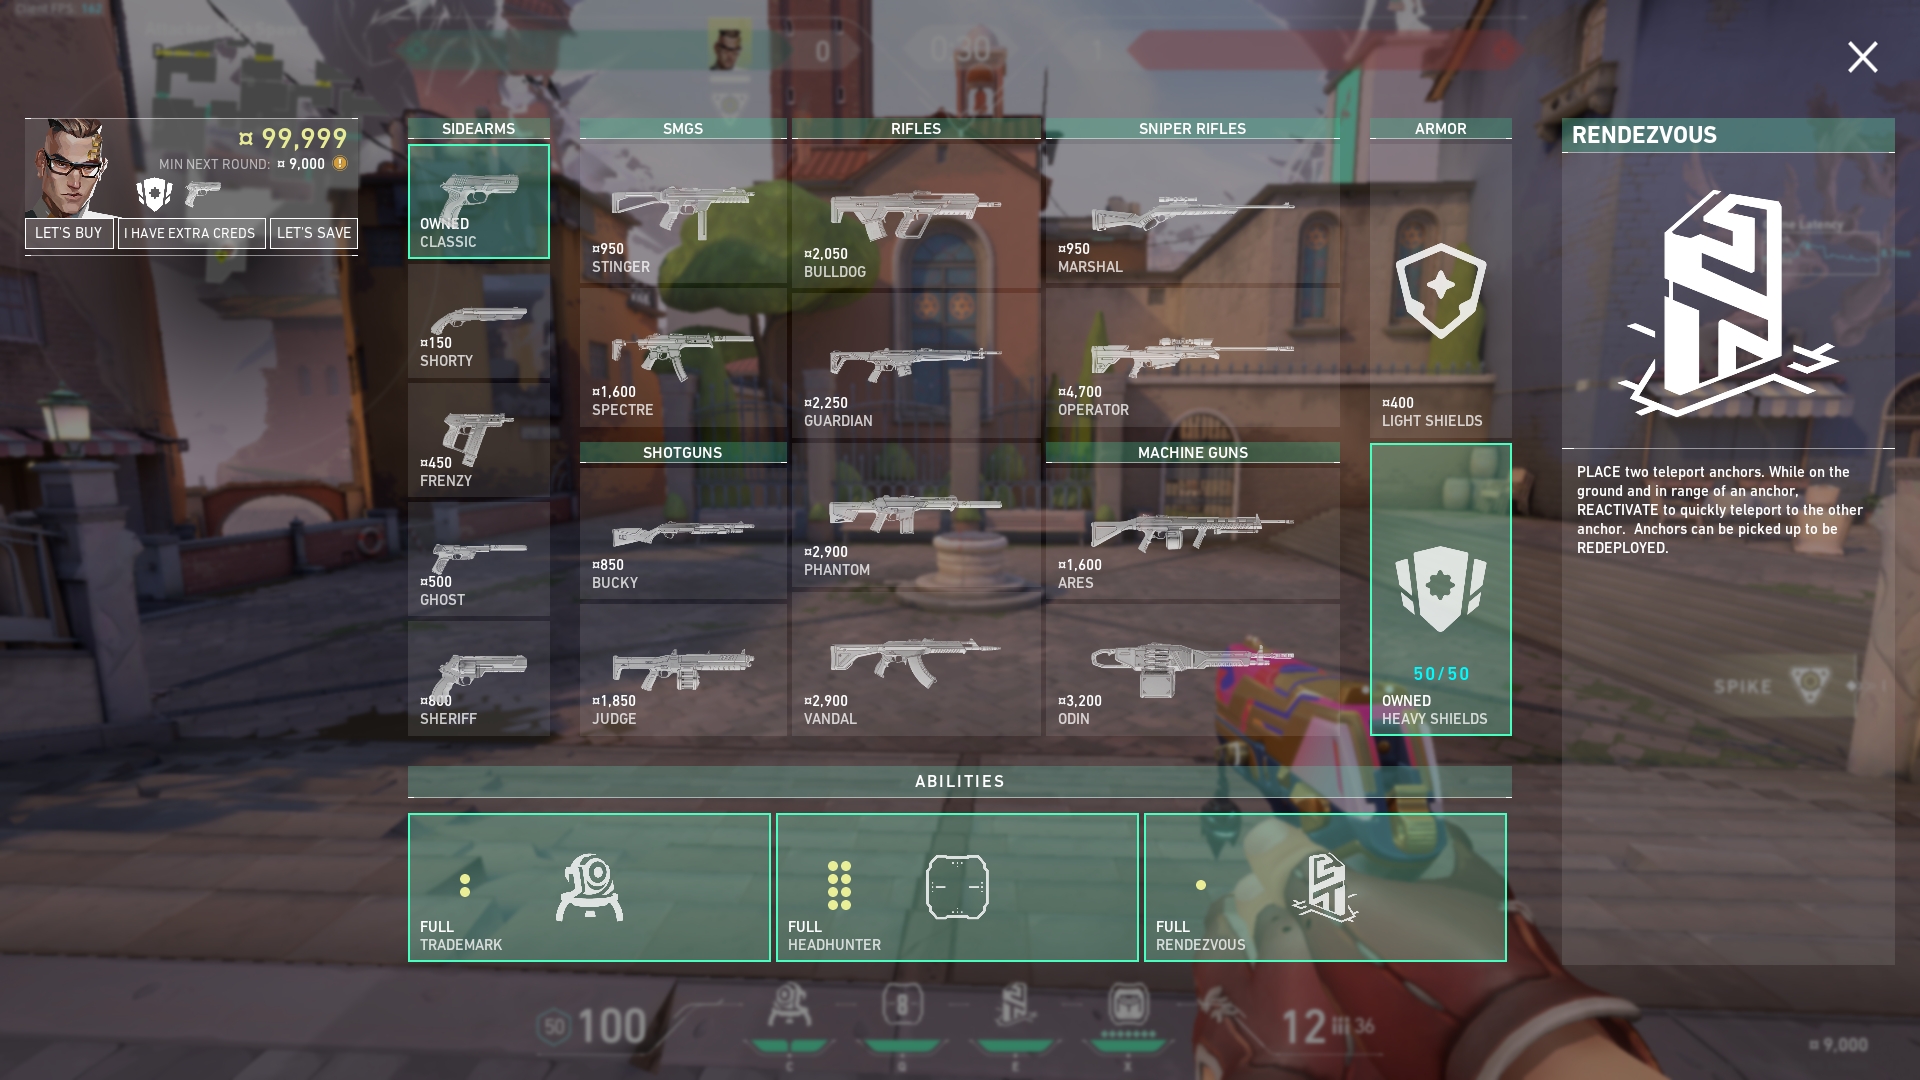

In [50]:
df_new['Price'] = df_new['Price'].replace([200,400,1000,2100,2500,1100,4500,900,1500],[150,450,950,2050,2250,950,4700,850,1850])
df_new['Fire Rate'] = df_new['Fire Rate'].replace([3.30,18,9.15,6.5,9.25,0.75,10],[3.33,16,10,5.25,9.75,0.6,13])
#note: fire Rate of Odin increases overe time
df_new['HDMG_0'] = df_new['HDMG_0'].replace([36,160,116,156,55],[24,159,115,160,40])
df_new.at[9, 'HDMG_0'] = 156
df_new['BDMG_0'] = df_new['BDMG_0'].replace([33,22,39],[30,20,40])
df_new.at[9, 'BDMG_0'] = 39
df_new['LDMG_0'] = df_new['LDMG_0'].replace([26,47,23,30,49,33,127],[25,46,22,29,48,34,120])
df_new.at[9, 'LDMG_0'] = 33
#other minor changes damage/distance
df_new.at[10, 'HDMG_1'] = 160
df_new.at[10, 'HDMG_2'] = 160
df_new.at[10, 'BDMG_1'] = 40
df_new.at[10, 'BDMG_2'] = 40
df_new.at[10, 'LDMG_1'] = 34
df_new.at[10, 'LDMG_2'] = 34
df_new.at[8, 'LDMG_1'] = 48
df_new.at[8, 'LDMG_2'] = 48
df_new.at[7, 'LDMG_1'] = 29
df_new.at[9, 'LDMG_2'] = 29
df_new.at[13, 'HDMG_2'] = 18
df_new.at[13, 'LDMG_2'] = 7
df_new.at[14, 'HDMG_1'] = 20
df_new.at[14, 'HDMG_2'] = 14
df_new.at[14, 'BDMG_1'] = 10
df_new.at[14, 'LDMG_2'] = 8
df_new.at[14, 'LDMG_1'] = 5

In [8]:
df_new.head()

Name Weapon Type  Price  Fire Rate Wall Penetration  Magazine Capacity  \
0  Classic     Sidearm      0       6.75              Low                 12   
1   Shorty     Sidearm    150       3.33              Low                  2   
2   Frenzy     Sidearm    450      13.00              Low                 13   
3    Ghost     Sidearm    500       6.75           Medium                 15   
4  Sheriff     Sidearm    800       4.00             High                  6   

   Spread ADS  Spread HIP  HDMG_0  BDMG_0  LDMG_0  HDMG_1  BDMG_1  LDMG_1  \
0        0.40        0.40      78      26      22      78      26      22   
1        4.00        4.00      24      12      10      24       8       6   
2        0.45        0.45      78      26      22      63      21      17   
3        0.30        0.30     105      30      25      88      25      21   
4        0.25        0.25     159      55      46     160      55      47   

   HDMG_2  BDMG_2  LDMG_2  
0      66      22      18  
1       9       3       2  
2      63      21      17  
3      88      25      21  
4     145      50      43

###  Difference between old weapon stats and new stats

In [51]:
df_diff=df_new[['Price','Fire Rate','HDMG_0','BDMG_0','LDMG_0']].subtract(df_old[['Price','Fire Rate','HDMG_0','BDMG_0','LDMG_0']])
df_diff=df_diff.set_index(df_new['Name'])
df_diff = df_diff[(df_diff.T != 0).any()]
print("The difference between old weapon stats and new stats")
df_diff

The difference between old weapon stats and new stats


Price  Fire Rate  HDMG_0  BDMG_0  LDMG_0
Name                                              
Shorty      -50       0.03     -12       0       0
Frenzy       50       3.00       0       0       0
Ghost         0       0.00       0      -3      -1
Sheriff       0       0.00      -1       0      -1
Stinger     -50      -2.00       0       0      -1
Bulldog     -50       0.85      -1       0      -1
Guardian   -250      -1.25       0       0      -1
Vandal        0       0.50       4       1       1
Marshall   -150       0.00       0       0       0
Operator    200      -0.15       0       0      -7
Bucky       -50       0.00     -15      -2       0
Judge       350       0.00       0       0       0
Ares          0       3.00       0       0       0

###  Prices

In [10]:
def return_sorted(col_name):
    sorted_df = df_new.sort_values(by=col_name)
    return {'weapon': sorted_df['Name'].to_list(), 'values': sorted_df[col_name].to_list()}

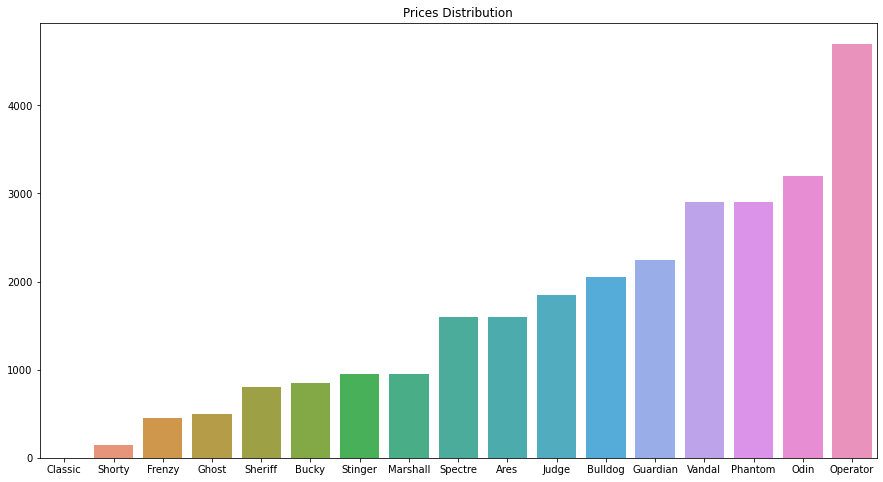

In [28]:
price_dict = return_sorted('Price')

fig_prices=  sns.barplot(x="weapon", y="values", data=price_dict) 
fig_prices.set_title('Prices Distribution');

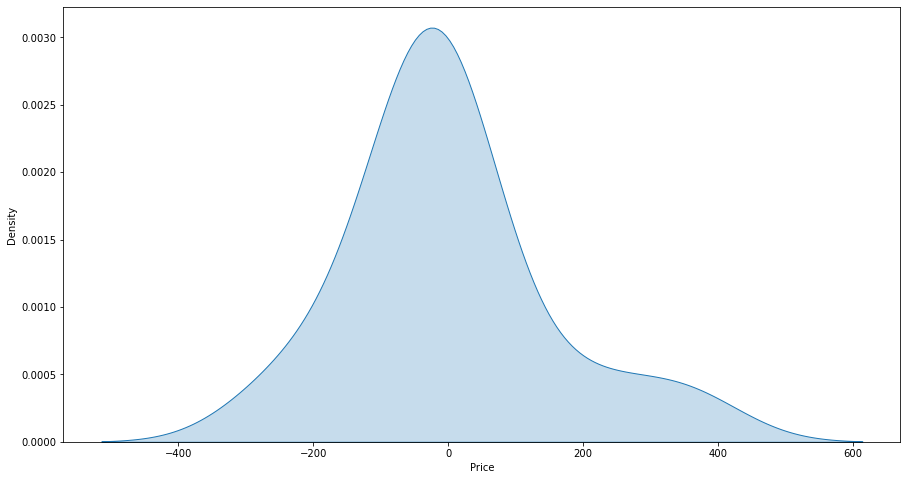

In [23]:
sns.kdeplot(data=df_diff['Price'], shade=True);


###  Types of weapons 

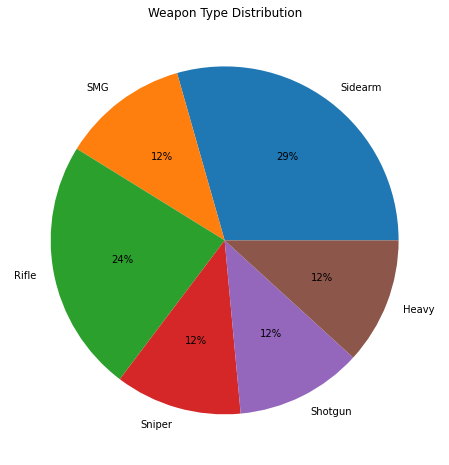

In [32]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

weapon_type = dict(Counter(df_new['Weapon Type']))
weapon_type = {'Weapon Type': list(weapon_type.keys()), 'count': list(weapon_type.values())}
fig=  plt.pie(weapon_type['count'], labels=weapon_type['Weapon Type'], autopct = '%0.0f%%')
plt.title('Weapon Type Distribution');


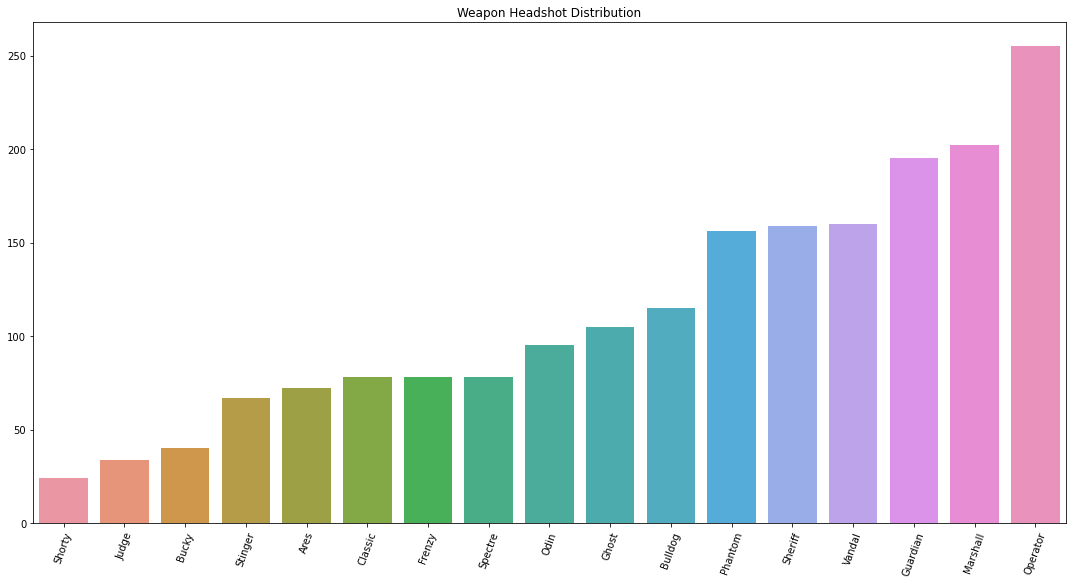

In [35]:


headshot_dict = return_sorted('HDMG_0')
bodyshot_dict = return_sorted('BDMG_0')


sns.barplot(x="weapon", y="values", data=headshot_dict) 
plt.xticks(rotation=70)
plt.tight_layout()
plt.title('Weapon Headshot Distribution');



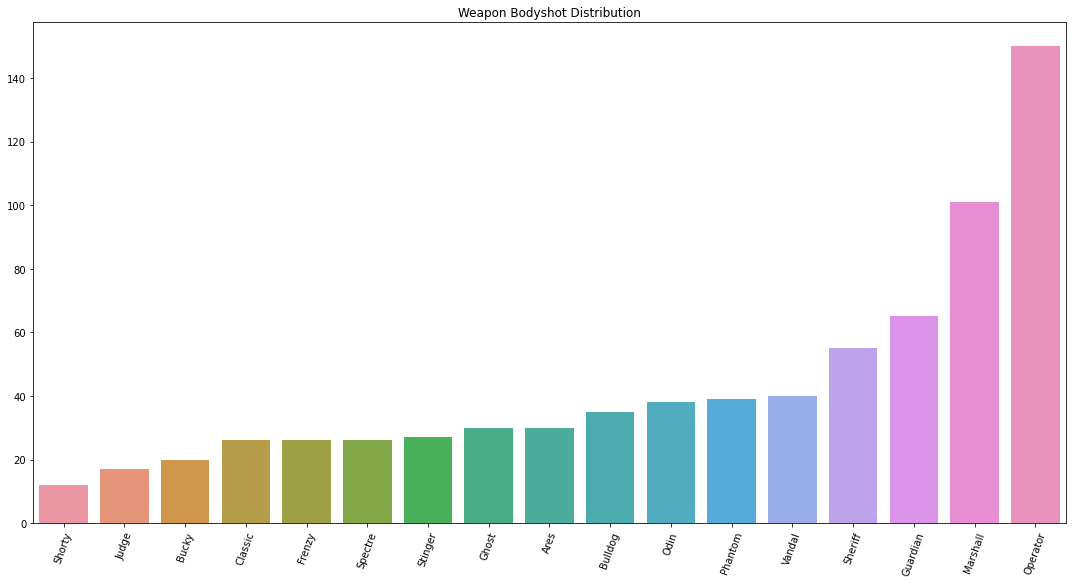

In [36]:


sns.barplot(x="weapon", y="values", data=bodyshot_dict) 
plt.xticks(rotation=70)
plt.tight_layout()
plt.title('Weapon Bodyshot Distribution');


### Models :

In [52]:
df_new.describe()

Price  Fire Rate  Magazine Capacity  Spread ADS  Spread HIP  \
count    17.000000  17.000000          17.000000   17.000000   17.000000   
mean   1629.411765   7.697647          21.235294    0.779824    1.173529   
std    1261.578726   4.913525          23.823647    1.114471    1.443749   
min       0.000000   0.600000           2.000000    0.000000    0.100000   
25%     800.000000   3.500000           6.000000    0.157000    0.300000   
50%    1600.000000   6.750000          13.000000    0.300000    0.450000   
75%    2250.000000  12.000000          25.000000    0.790000    1.000000   
max    4700.000000  16.000000         100.000000    4.000000    5.000000   

           HDMG_0      BDMG_0      LDMG_0      HDMG_1      BDMG_1      LDMG_1  \
count   17.000000   17.000000   17.000000   17.000000   17.000000   17.000000   
mean   112.529412   43.352941   35.764706  107.647059   41.352941   34.176471   
std     65.352044   34.622863   27.673384   67.755942   35.862482   30.406075   
min     24.000000   12.000000   10.000000   20.000000    8.000000    5.000000   
25%     72.000000   26.000000   22.000000   63.000000   22.000000   18.000000   
50%     95.000000   30.000000   25.000000   88.000000   30.000000   25.000000   
75%    159.000000   40.000000   34.000000  160.000000   40.000000   34.000000   
max    255.000000  150.000000  120.000000  255.000000  150.000000  127.000000   

           HDMG_2      BDMG_2      LDMG_2  
count   17.000000   17.000000   17.000000  
mean   101.588235   39.294118   32.764706  
std     70.336743   36.706206   30.918298  
min      9.000000    3.000000    2.000000  
25%     63.000000   22.000000   18.000000  
50%     77.000000   28.000000   23.000000  
75%    145.000000   40.000000   34.000000  
max    255.000000  150.000000  127.000000

In [53]:
df_new=df_new.set_index("Name")


In [55]:
df_anal=df_new.iloc[:, :10]
cols = df_anal.columns.tolist()
cols = [cols[0]]+cols[2:]+[cols[1]]
df_anal = df_anal[cols] 
df_anal

Weapon Type  Fire Rate Wall Penetration  Magazine Capacity  \
Name                                                                  
Classic      Sidearm       6.75              Low                 12   
Shorty       Sidearm       3.33              Low                  2   
Frenzy       Sidearm      13.00              Low                 13   
Ghost        Sidearm       6.75           Medium                 15   
Sheriff      Sidearm       4.00             High                  6   
Stinger          SMG      16.00              Low                 20   
Spectre          SMG      13.33           Medium                 30   
Bulldog        Rifle      10.00           Medium                 24   
Guardian       Rifle       5.25           Medium                 12   
Phantom        Rifle      11.00           Medium                 30   
Vandal         Rifle       9.75           Medium                 25   
Marshall      Sniper       1.50           Medium                  5   
Operator      Sniper       0.60             High                  5   
Bucky        Shotgun       1.10              Low                  5   
Judge        Shotgun       3.50           Medium                  7   
Ares           Heavy      13.00             High                 50   
Odin           Heavy      12.00             High                100   

          Spread ADS  Spread HIP  HDMG_0  BDMG_0  LDMG_0  Price  
Name                                                             
Classic        0.400        0.40      78      26      22      0  
Shorty         4.000        4.00      24      12      10    150  
Frenzy         0.450        0.45      78      26      22    450  
Ghost          0.300        0.30     105      30      25    500  
Sheriff        0.250        0.25     159      55      46    800  
Stinger        0.500        0.65      67      27      22    950  
Spectre        0.250        0.40      78      26      22   1600  
Bulldog        0.300        0.30     115      35      29   2050  
Guardian       0.000        0.10     195      65      48   2250  
Phantom        0.110        0.20     156      39      33   2900  
Vandal         0.157        0.25     160      40      34   2900  
Marshall       0.000        1.00     202     101      85    950  
Operator       0.000        5.00     255     150     120   4700  
Bucky          2.600        2.60      40      20      19    850  
Judge          2.250        2.25      34      17      14   1850  
Ares           0.900        1.00      72      30      25   1600  
Odin           0.790        0.80      95      38      32   3200

In [18]:
# Correlation matrix
# from https://www.kaggle.com/kerneler/starter-valorant-weapon-stats-f856dcf8-1
def plotCorrelationMatrix(df, graphWidth):

    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for the weapons dataframe', fontsize=15)
    plt.show()

C:\Users\anass\AppData\Local\Temp/ipykernel_82712/3485586321.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



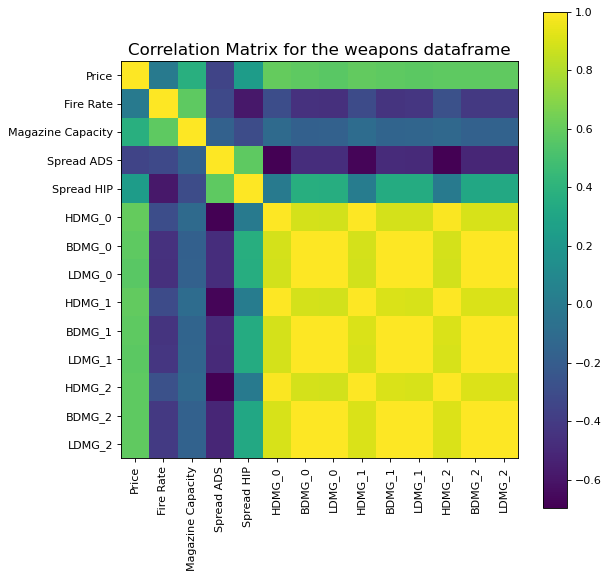

In [19]:
plotCorrelationMatrix(df_new, 8)



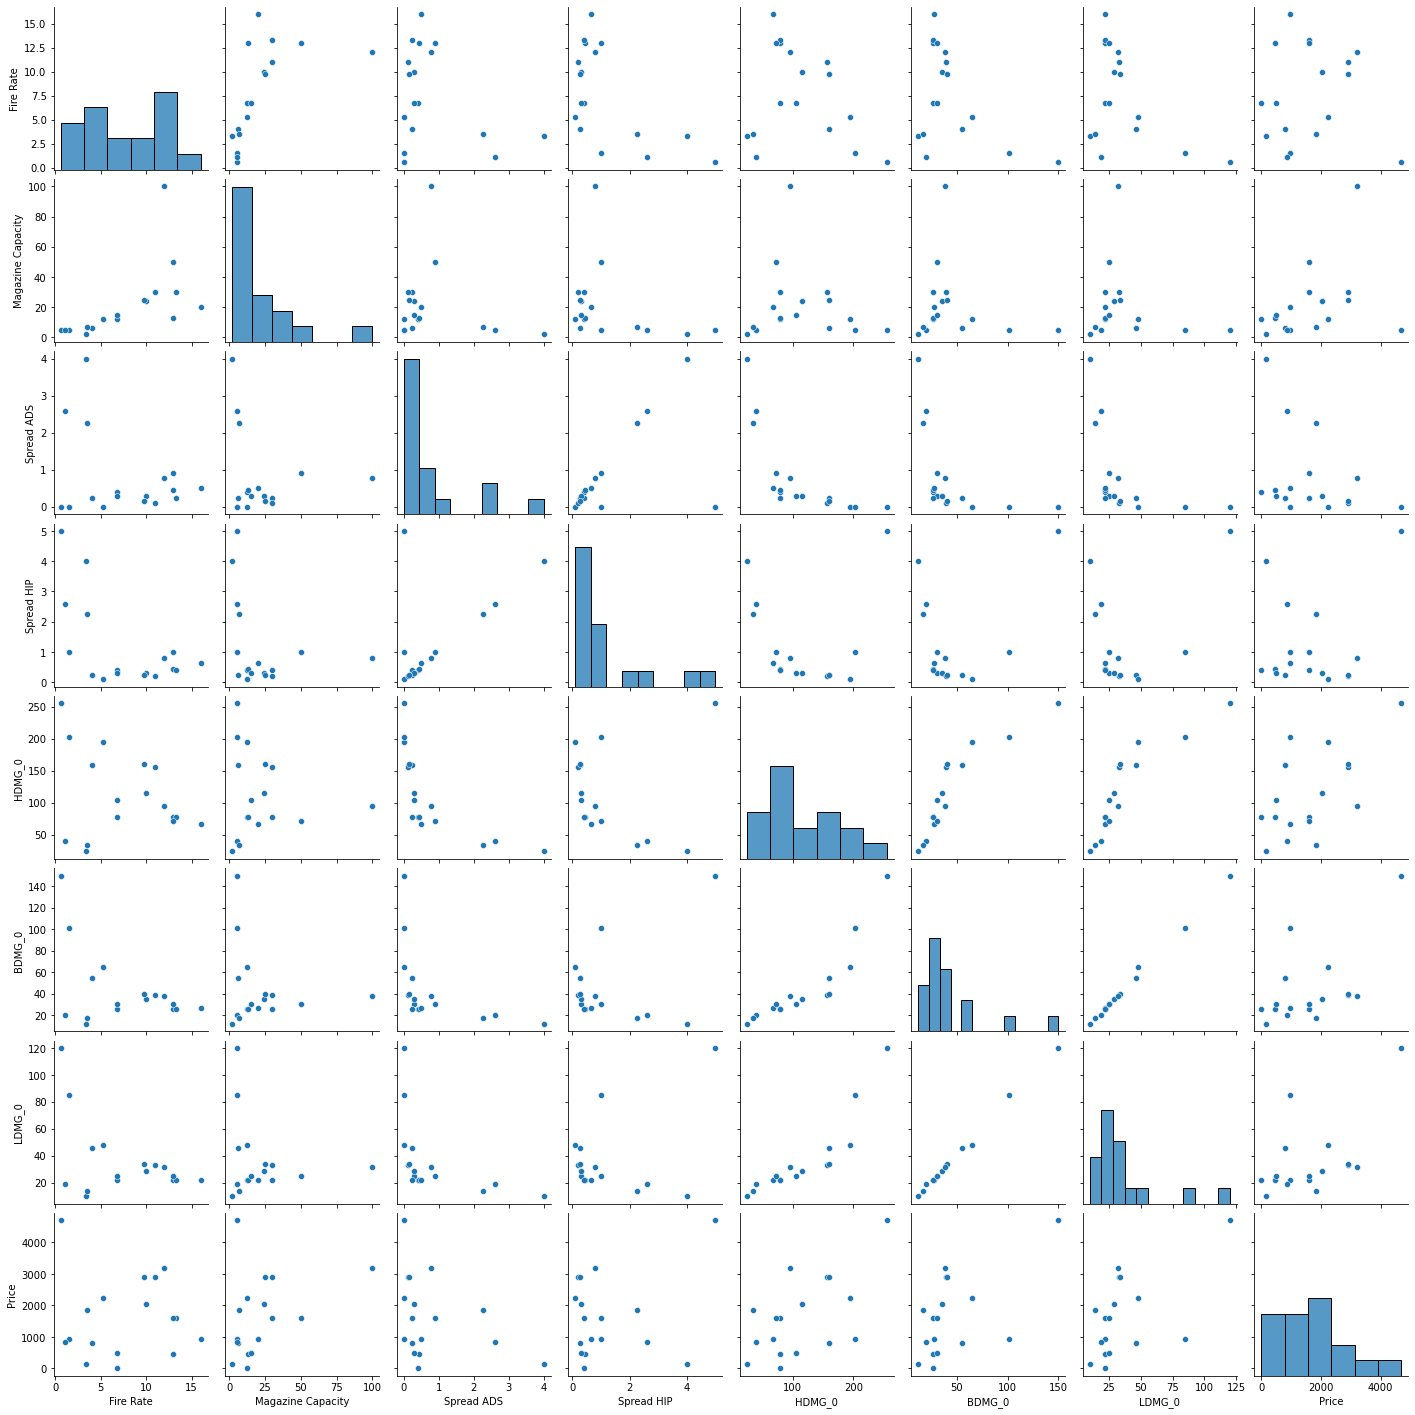

In [20]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df_anal);


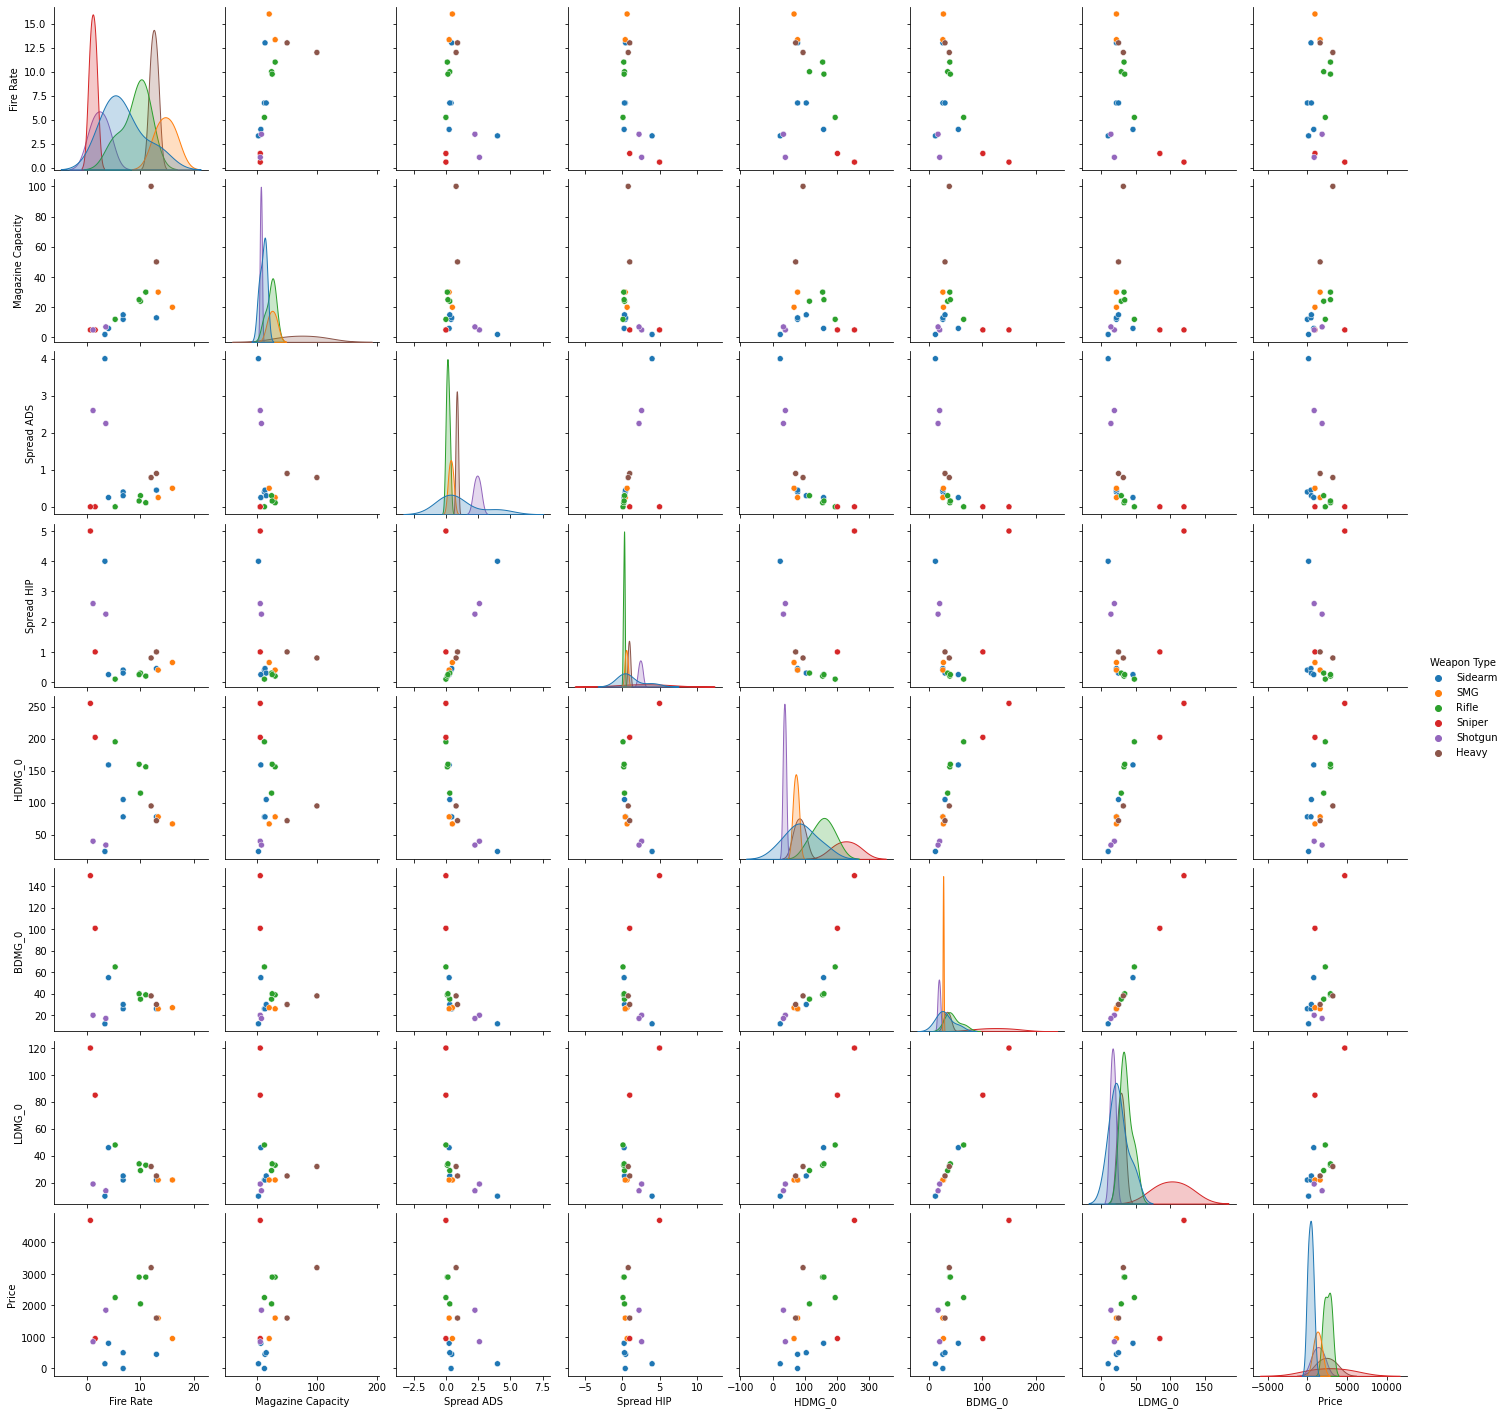

In [21]:
sns.pairplot(df_anal,hue='Weapon Type');
#,hue='Gender'

What we can see here us that the damages (Head, body and leg ) are correlated between each other. The price is kind of correlated with the damage and the magazine capacity (with some outliers). And the fire rate is kind of independent from the rest.

First we try with categorical variables, then without categorical variables.

The dataset set is small so there isn't much to draw from it but we are just playing

In [56]:

def get_X_y(columns):
    X = df_anal[columns] #
    Y = df_anal['Price']
    X = pd.get_dummies(data=X)#, drop_first=True)
    return X,Y


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as msr
from sklearn.preprocessing import MinMaxScaler

def model_analysis(X,Y,loga=False,drop_first=False,preprocessing = True):
    if loga:
        # We shouldnt have any negative values so we might try the Logarithm
        Y_log = Y.apply(lambda x: np.log(x))
        Y_log = Y_log.drop(labels=['Classic'])
        X = X.drop(['Classic'])
        X = pd.get_dummies(data=X, drop_first=drop_first)
        Y = Y_log
    if preprocessing :
        scaler = MinMaxScaler()
        X_tr=scaler.fit_transform(X)
        X=pd.DataFrame(X_tr, index=X.index, columns=X.columns)
        
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
    predictions = model.predict(X_test)
    sns.regplot(y_test,predictions)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary())
    if loga:
        #test_score = model.score(X_test, y_test)
        model_score = model.score(X, Y)
        test_score = msr(np.exp(model.predict(X_test)), np.exp(y_test))
        model_score2 = msr(np.exp(model.predict(X)), np.exp(Y_log))

    
    else:
        #test_score = model.score(X_test, y_test)
        model_score = model.score(X, Y)
        test_score = msr(model.predict(X_test),y_test)
        model_score2 = msr(model.predict(X),Y)


    return coeff_parameter,test_score,model_score,model_score2

    
    
    

In [24]:
def model_analysis_no_plot(X,Y,loga=False,drop_first=False,preprocessing = True):
    if loga:
        # We shouldnt have any negative values so we might try the Logarithm
        Y_log = Y.apply(lambda x: np.log(x))
        Y_log = Y_log.drop(labels=['Classic'])
        X = X.drop(['Classic'])
        X = pd.get_dummies(data=X, drop_first=drop_first)
        Y = Y_log
    if preprocessing :
        scaler = MinMaxScaler()
        X_tr=scaler.fit_transform(X)
        X=pd.DataFrame(X_tr, index=X.index, columns=X.columns)
        
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)

    if loga:

        test_score = msr(np.exp(model.predict(X_test)), np.exp(y_test))
        model_score = msr(np.exp(model.predict(X)), np.exp(Y_log))

    
    else:
        test_score = msr(model.predict(X_test),y_test)
        model_score = msr(model.predict(X),Y)


    return test_score,model_score,model


In [25]:
columns=['Weapon Type', 'Wall Penetration','Fire Rate','Magazine Capacity','Spread ADS','Spread HIP','HDMG_0','BDMG_0','LDMG_0']
X,Y = get_X_y(columns)     
X.head()

Fire Rate  Magazine Capacity  Spread ADS  Spread HIP  HDMG_0  BDMG_0  \
Name                                                                            
Classic       6.75                 12        0.40        0.40      78      26   
Shorty        3.33                  2        4.00        4.00      24      12   
Frenzy       13.00                 13        0.45        0.45      78      26   
Ghost         6.75                 15        0.30        0.30     105      30   
Sheriff       4.00                  6        0.25        0.25     159      55   

         LDMG_0  Weapon Type_Heavy  Weapon Type_Rifle  Weapon Type_SMG  \
Name                                                                     
Classic      22                  0                  0                0   
Shorty       10                  0                  0                0   
Frenzy       22                  0                  0                0   
Ghost        25                  0                  0                0   
Sheriff      46                  0                  0                0   

         Weapon Type_Shotgun  Weapon Type_Sidearm  Weapon Type_Sniper  \
Name                                                                    
Classic                    0                    1                   0   
Shorty                     0                    1                   0   
Frenzy                     0                    1                   0   
Ghost                      0                    1                   0   
Sheriff                    0                    1                   0   

         Wall Penetration_High  Wall Penetration_Low  Wall Penetration_Medium  
Name                                                                           
Classic                      0                     1                        0  
Shorty                       0                     1                        0  
Frenzy                       0                     1                        0  
Ghost                        0                     0                        1  
Sheriff                      1                     0                        0

Let's see some cases

preprocessing: True -- drop_first: False -- loga: True
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                nan
Time:                        21:01:37   Log-Likelihood:                 329.24
No. Observations:                  11   AIC:                            -636.5
Df Residuals:                       0   BIC:                            -632.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

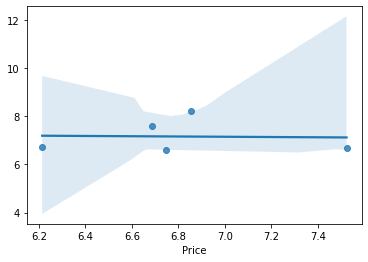

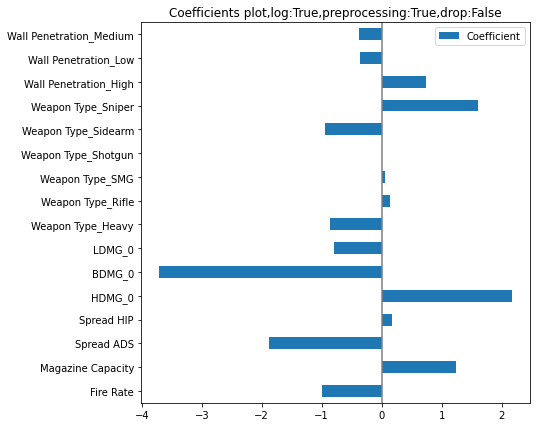

In [26]:
#for preprocessing in True,False :
#    for drop_first in True,False :
#        for loga in  True,False :

preprocessing,drop_first,loga = True, False, True
print('preprocessing:',preprocessing ,"--",'drop_first:',drop_first ,"--",'loga:',loga)
results = model_analysis(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)
#coeff_parameter,test_score,model_score,model_score2
coeff_parameter = results[0]
coeff_parameter.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficients plot,log:{},preprocessing:{},drop:{}".format(loga,preprocessing,drop_first))
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
print("Model test error :", results[1])
print("Model total error :",results[3] )


The price is positively correlated witht the head damage, but it is weird that's the coefficient is negative for the body damage. The spead is negative as expected, (HIP less infulential), and the fire rate has a negative coeff too. The category is having a considerable effect too.

preprocessing: False -- drop_first: True -- loga: True
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                nan
Time:                        21:01:37   Log-Likelihood:                 313.90
No. Observations:                  11   AIC:                            -605.8
Df Residuals:                       0   BIC:                            -601.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

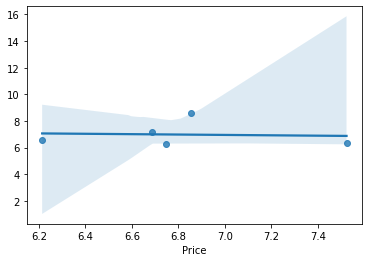

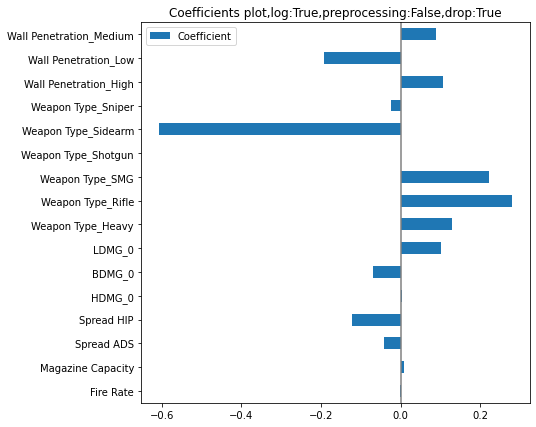

In [27]:
preprocessing,drop_first,loga = False, True, True
print('preprocessing:',preprocessing ,"--",'drop_first:',drop_first ,"--",'loga:',loga)
results = model_analysis(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)
#coeff_parameter,test_score,model_score,model_score2
coeff_parameter = results[0]
coeff_parameter.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficients plot,log:{},preprocessing:{},drop:{}".format(loga,preprocessing,drop_first))
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
print("Model test error :", results[1])
print("Model total error :",results[3] )


Without scaling, the categorical coeff has more value, which expected (as an equilibrium with the previous case)

preprocessing: True -- drop_first: False -- loga: False
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                nan
Time:                        21:01:38   Log-Likelihood:                 272.47
No. Observations:                  11   AIC:                            -522.9
Df Residuals:                       0   BIC:                            -518.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

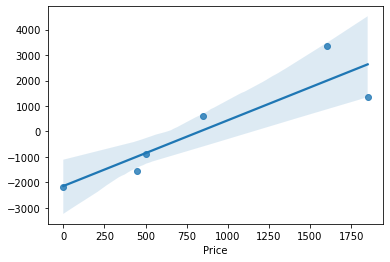

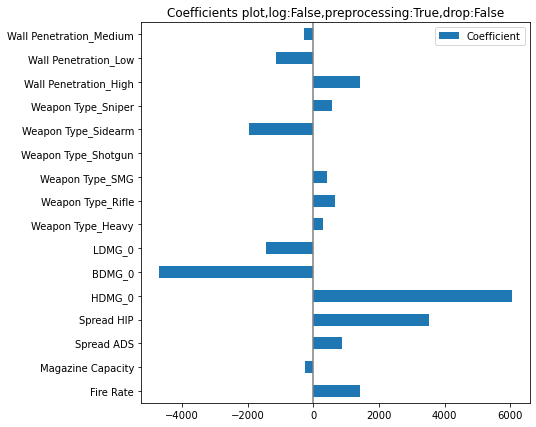

In [28]:
preprocessing,drop_first,loga = True, False, False
print('preprocessing:',preprocessing ,"--",'drop_first:',drop_first ,"--",'loga:',loga)
results = model_analysis(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)
#coeff_parameter,test_score,model_score,model_score2
coeff_parameter = results[0]
coeff_parameter.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficients plot,log:{},preprocessing:{},drop:{}".format(loga,preprocessing,drop_first))
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
print("Model test error :", results[1])
print("Model total error :",results[3])

Now without the categories

In [29]:
columns=['Fire Rate','Magazine Capacity','Spread ADS','Spread HIP','HDMG_0','BDMG_0','LDMG_0']
X,Y = get_X_y(columns)     
X.head()

Fire Rate  Magazine Capacity  Spread ADS  Spread HIP  HDMG_0  BDMG_0  \
Name                                                                            
Classic       6.75                 12        0.40        0.40      78      26   
Shorty        3.33                  2        4.00        4.00      24      12   
Frenzy       13.00                 13        0.45        0.45      78      26   
Ghost         6.75                 15        0.30        0.30     105      30   
Sheriff       4.00                  6        0.25        0.25     159      55   

         LDMG_0  
Name             
Classic      22  
Shorty       10  
Frenzy       22  
Ghost        25  
Sheriff      46

preprocessing: True -- drop_first: True -- loga: True
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     8.105
Date:                Sat, 05 Mar 2022   Prob (F-statistic):             0.0567
Time:                        21:01:38   Log-Likelihood:                 1.3805
No. Observations:                  11   AIC:                             13.24
Df Residuals:                       3   BIC:                             16.42
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

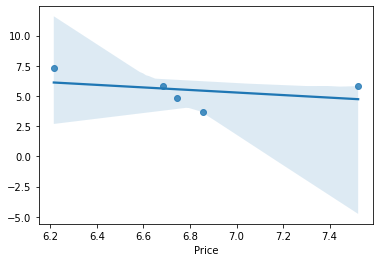

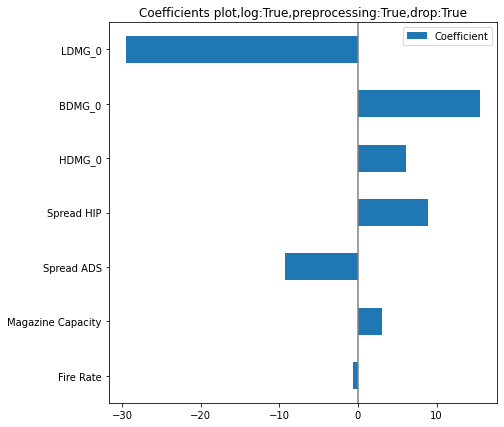

In [30]:
preprocessing,drop_first,loga = True, True, True
#the drop_first doesnt matter here
print('preprocessing:',preprocessing ,"--",'drop_first:',drop_first ,"--",'loga:',loga)
results = model_analysis(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)
#coeff_parameter,test_score,model_score,model_score2
coeff_parameter = results[0]
coeff_parameter.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficients plot,log:{},preprocessing:{},drop:{}".format(loga,preprocessing,drop_first))
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
print("Model test error :", results[1])
print("Model total error :",results[3])

It's weird that the Leg damage has a relatively big coefficient (in the absolute value), and that the HIP has a positive coefficient.
Note that while the error is big the performance of the model is better than without the spread variables.

preprocessing: False -- drop_first: True -- loga: False
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     27.43
Date:                Sat, 05 Mar 2022   Prob (F-statistic):             0.0101
Time:                        21:01:38   Log-Likelihood:                -71.227
No. Observations:                  11   AIC:                             158.5
Df Residuals:                       3   BIC:                             161.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

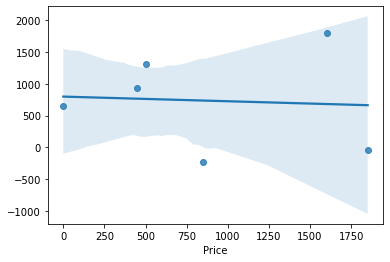

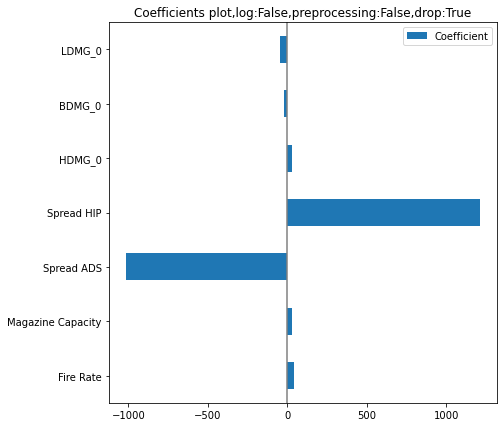

In [31]:
preprocessing,drop_first,loga = False, True, False
#the drop_first doesnt matter here
print('preprocessing:',preprocessing ,"--",'drop_first:',drop_first ,"--",'loga:',loga)
results = model_analysis(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)
#coeff_parameter,test_score,model_score,model_score2
coeff_parameter = results[0]
coeff_parameter.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficients plot,log:{},preprocessing:{},drop:{}".format(loga,preprocessing,drop_first))
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
print("Model test error :", results[1])
print("Model total error :",results[3])

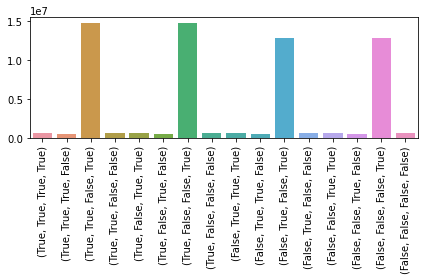

In [32]:
#comparing errors
error_total = dict()
error_test =  dict()
for preprocessing in True,False :
    for drop_first in True,False :
        for loga in  True,False :
            for category in  True,False :
                if category == True :
                    columns = ['Weapon Type', 'Wall Penetration','Fire Rate','Magazine Capacity','HDMG_0','BDMG_0','LDMG_0']
                else :
                    columns = ['Fire Rate','Magazine Capacity','HDMG_0','BDMG_0','LDMG_0']
                X,Y = get_X_y(columns) 
                results = model_analysis_no_plot(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)
                error_total[str((preprocessing,drop_first,loga,category))]=results[1]
                error_test[str((preprocessing,drop_first,loga,category))]=results[0]



#plt.bar(list(error_total.keys()), list(error_total.values()))
sns.barplot(x=list(error_total.keys()),y=list(error_total.values()));
plt.xticks(rotation=90)
plt.tight_layout()

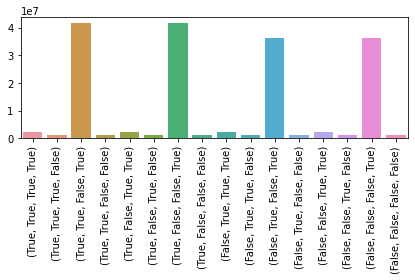

In [33]:
sns.barplot(x=list(error_test.keys()),y=list(error_test.values()));
plt.xticks(rotation=90)
plt.tight_layout()

In [34]:
# without the four outliers
outliers= [(True, True, False, True),(True, False, False, True),(False, True, False, True),(False, False, False, True)]
for outlier in outliers:
    del error_total[str(outlier)]
    del error_test[str(outlier)]

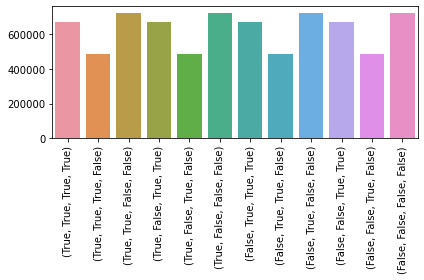

In [35]:
sns.barplot(x=list(error_total.keys()),y=list(error_total.values()));
plt.xticks(rotation=90)
plt.tight_layout()

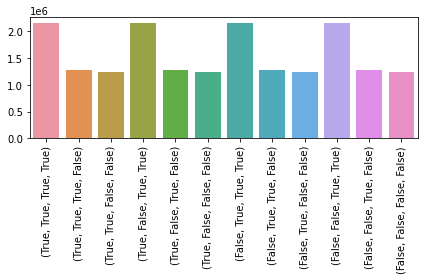

In [36]:
sns.barplot(x=list(error_test.keys()),y=list(error_test.values()));
plt.xticks(rotation=90)
plt.tight_layout()

All the errors are huge, this is not something to model with linear regression , also other variables aren't taken into consideration , like the spray.

In [37]:
#The T,F,T,F example
columns=['Fire Rate','Magazine Capacity','HDMG_0','BDMG_0','LDMG_0']
X,Y = get_X_y(columns)     


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     12.41
Date:                Sat, 05 Mar 2022   Prob (F-statistic):            0.00760
Time:                        21:01:40   Log-Likelihood:               -0.79261
No. Observations:                  11   AIC:                             13.59
Df Residuals:                       5   BIC:                             15.97
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8563      0.45

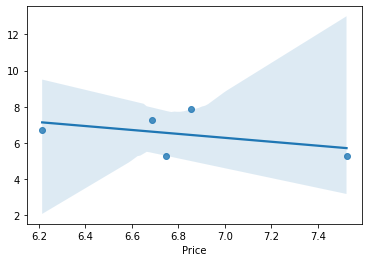

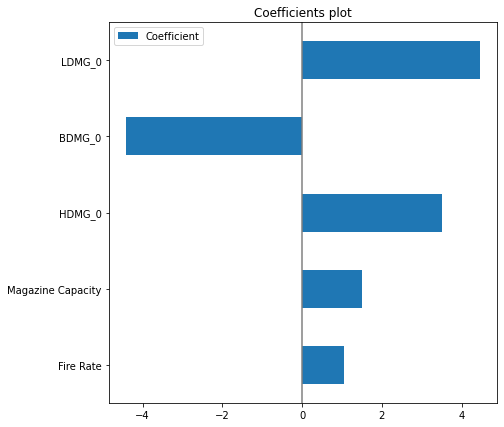

In [38]:
preprocessing,drop_first,loga = True, False, True
results = model_analysis(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)
coeff_parameter = results[0]
coeff_parameter.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficients plot")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
print("Model test error :", results[1])
print("Model total error :",results[3] )
model =  model_analysis_no_plot(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)[2]


In [39]:
scaler = MinMaxScaler()
X_tr=scaler.fit_transform(X[1:])
X=pd.DataFrame(X_tr, index=X[1:].index, columns=X[1:].columns)
predicted = pd.Series(np.exp(model.predict(X)), index=Y[1:].index)
predicted = predicted.astype(int)
comparaison = predicted.to_frame(name="predicted")
comparaison["Actual value"] = Y[1:]
comparaison

predicted  Actual value
Name                             
Shorty          154           150
Frenzy          832           450
Ghost           839           500
Sheriff        1451           800
Stinger         930           950
Spectre        1102          1600
Bulldog        1401          2050
Guardian       2354          2250
Phantom        3167          2900
Vandal         2889          2900
Marshall       2583           950
Operator       4680          4700
Bucky           197           850
Judge           197          1850
Ares           1326          1600
Odin           3868          3200

In [57]:
#The T,F,T,F example with the spread
columns=['Fire Rate','Magazine Capacity','Spread ADS','Spread HIP','HDMG_0','BDMG_0','LDMG_0']
X,Y = get_X_y(columns)     


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     8.105
Date:                Sat, 05 Mar 2022   Prob (F-statistic):             0.0567
Time:                        21:01:40   Log-Likelihood:                 1.3805
No. Observations:                  11   AIC:                             13.24
Df Residuals:                       3   BIC:                             16.42
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3929      2.64

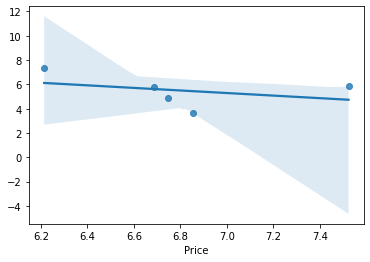

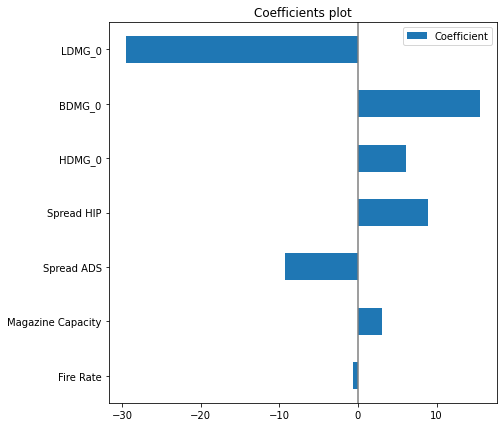

In [41]:
preprocessing,drop_first,loga = True, False, True
results = model_analysis(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)
coeff_parameter = results[0]
coeff_parameter.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficients plot")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
print("Model test error :", results[1])
print("Model total error :",results[3] )
model =  model_analysis_no_plot(X,Y,loga=loga,drop_first=drop_first,preprocessing = preprocessing)[2]

In [42]:
scaler = MinMaxScaler()
X_tr=scaler.fit_transform(X[1:])
X=pd.DataFrame(X_tr, index=X[1:].index, columns=X[1:].columns)
predicted = pd.Series(np.exp(model.predict(X)), index=Y[1:].index)
predicted = predicted.astype(int)
comparaison = predicted.to_frame(name="predicted")
comparaison["Actual value"] = Y[1:]
comparaison

predicted  Actual value
Name                             
Shorty          152           150
Frenzy          710           450
Ghost          1523           500
Sheriff         329           800
Stinger         828           950
Spectre        1712          1600
Bulldog        1362          2050
Guardian       2380          2250
Phantom        3224          2900
Vandal         2725          2900
Marshall         38           950
Operator       4723          4700
Bucky           127           850
Judge           340          1850
Ares           1247          1600
Odin           3705          3200

In [43]:
scaler.get_params()

{'clip': False, 'copy': True, 'feature_range': (0, 1)}

In [44]:
equation = ['Price'+'=']+['exp(']+[str(round(model.coef_[i], 2))+'*'+'scaler('+columns[i]+')'+'+' for i in range(len(columns))]+[str(model.intercept_)+')']

print(''.join(equation))
            

Price=exp(-0.66*scaler(Fire Rate)+2.99*scaler(Magazine Capacity)+-9.32*scaler(Spread ADS)+8.89*scaler(Spread HIP)+6.11*scaler(HDMG_0)+15.49*scaler(BDMG_0)+-29.5*scaler(LDMG_0)+7.3929436707212215)


In [45]:
warnings.filterwarnings('default')

## Matches : 



The dataset here is taken from [here on kaggle](https://www.kaggle.com/visualize25/valorant-pro-matches-full-data) 
and it's taken from [vlr.gg](vlr.gg) .

##### Content :

There is four tables. The top level is Matches that will tell you teams playing and match (map) score. Game is the next level that breaks down the specific maps played. Then GameRounds gives a round by round breakdown which shows who won, economy of each team, win type, and buy type, whenever the info is available. The game rounds are packaged in one string that you should be able to cast as a json. Lastly there is GameScoreboard which gives you the player performance, as well as things like number of first kills, first deaths, 2Ks, 3Ks, One v Ones, One v Twos, ect.

This content introduction is made by [Joshua Broas](https://www.kaggle.com/visualize25) on kaagle.

In [46]:
warnings.filterwarnings('ignore')

In [47]:
import sqlite3
import pandas as pd
import sqlalchemy

con = sqlite3.connect(r"C:\Users\anass\Programmation\EDA\Valorant\valorant.sqlite")

cursor = con.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables_names=[name[0] for name in cursor.fetchall()]
cursor.close()
con.close()

cnx = sqlite3.connect(r"C:\Users\anass\Programmation\EDA\Valorant\valorant.sqlite")
list_of_dataframes = []


for name in tables_names:
    list_of_dataframes.append(pd.read_sql_query("SELECT * FROM {}".format(name), cnx))

In [48]:
tables_names

['Matches', 'Games', 'Game_Rounds', 'Game_Scoreboard']

In [49]:
df_matches ,df_games , df_rounds , df_scoreboard =tuple(list_of_dataframes)

In [50]:
del list_of_dataframes

In [51]:
df_matches.head()

MatchID                 Date       Patch EventID  \
0   62393  2022-01-08 15:30:00  Patch 3.12     826   
1   62403  2022-01-08 15:30:00  Patch 3.12     826   
2   62391  2022-01-08 12:30:00  Patch 3.12     826   
3   62396  2022-01-08 12:30:00  Patch 3.12     826   
4   62401  2022-01-08 12:30:00  Patch 3.12     826   

                                           EventName  \
0  Nerd Street Gamers Winter Championship - Regio...   
1  Nerd Street Gamers Winter Championship - Regio...   
2  Nerd Street Gamers Winter Championship - Regio...   
3  Nerd Street Gamers Winter Championship - Regio...   
4  Nerd Street Gamers Winter Championship - Regio...   

                  EventStage  Team1ID  Team2ID                Team1  \
0   Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
1   Group Stage: Decider (C)     7046     7047       Bjor's Kittens   
2  Group Stage: Winner's (A)     6461     6903                Akrew   
3  Group Stage: Winner's (B)     6164     7043             Radiance   
4  Group Stage: Winner's (C)     7045     7046     Salt and Vinegar   

                 Team2  Team1_MapScore  Team2_MapScore  
0             Pho Real               2               1  
1             Mugiwara               2               0  
2  Booster Seat Gaming               2               1  
3          sameROFLMAO               2               0  
4       Bjor's Kittens               2               0

In [52]:
df_games.head()

GameID MatchID     Map  Team1ID  Team2ID                Team1     Team2  \
0  60894   62393  Breeze     6903     6020  Booster Seat Gaming  Pho Real   
1  60895   62393    Bind     6903     6020  Booster Seat Gaming  Pho Real   
2  60896   62393   Haven     6903     6020  Booster Seat Gaming  Pho Real   
3  60924   62403  Icebox     7046     7047       Bjor's Kittens  Mugiwara   
4  60925   62403   Haven     7046     7047       Bjor's Kittens  Mugiwara   

                Winner  Team1_TotalRounds  Team2_TotalRounds  ...  \
0  Booster Seat Gaming                 13                  7  ...   
1             Pho Real                  2                 13  ...   
2  Booster Seat Gaming                 13                  8  ...   
3       Bjor's Kittens                 13                  6  ...   
4       Bjor's Kittens                 13                  9  ...   

  Team1_FullBuyWon Team2_PistolWon  Team2_Eco  Team2_EcoWon  Team2_SemiEco  \
0              8.0             0.0        4.0           0.0            2.0   
1              1.0             2.0        2.0           2.0            0.0   
2              9.0             1.0        2.0           1.0            2.0   
3              8.0             0.0        4.0           0.0            1.0   
4             11.0             1.0        3.0           2.0            3.0   

   Team2_SemiEcoWon  Team2_SemiBuy  Team2_SemiBuyWon  Team2_FullBuy  \
0               0.0            4.0               1.0           10.0   
1               0.0            4.0               3.0            9.0   
2               0.0            6.0               2.0           11.0   
3               0.0            2.0               1.0           12.0   
4               0.0            4.0               3.0           12.0   

   Team2_FullBuyWon  
0               6.0  
1               8.0  
2               5.0  
3               5.0  
4               4.0  

[5 rows x 36 columns]

In [53]:
df_rounds.head()

GameID  Team1ID  Team2ID                                       RoundHistory
0  60894     6903     6020  {1: {'RoundWinner': 'BOOS', 'ScoreAfterRound':...
1  60895     6903     6020  {1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':...
2  60896     6903     6020  {1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':...
3  60924     7046     7047  {1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':...
4  60925     7046     7047  {1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':...

In [54]:
df_scoreboard.head()

GameID PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  Deaths  \
0  60894     8419     Reduxx             Boos     jett  313.0   24.0    10.0   
1  60894      466     ChurmZ             Boos  chamber  227.0   16.0    10.0   
2  60894     3712   diaamond             Boos     sova  226.0   17.0     9.0   
3  60894     5099     Boltzy             Boos    viper  218.0   17.0    12.0   
4  60894     3983     Virtyy             Boos     skye   80.0    5.0    13.0   

   Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  \
0      3.0       14.0  ...      2.0      0.0      1.0      0.0        0.0   
1      7.0        6.0  ...      0.0      0.0      0.0      0.0        0.0   
2      8.0        8.0  ...      0.0      0.0      1.0      0.0        0.0   
3      2.0        5.0  ...      0.0      0.0      1.0      0.0        0.0   
4      3.0       -8.0  ...      0.0      0.0      0.0      0.0        0.0   

   OnevFour  OnevFive  Econ  Plants  Defuses  
0       0.0       0.0  74.0     0.0      0.0  
1       0.0       0.0  67.0     2.0      0.0  
2       0.0       0.0  58.0     3.0      0.0  
3       0.0       0.0  48.0     0.0      0.0  
4       0.0       0.0  21.0     0.0      0.0  

[5 rows x 28 columns]

In [55]:
df_games.head()

GameID MatchID     Map  Team1ID  Team2ID                Team1     Team2  \
0  60894   62393  Breeze     6903     6020  Booster Seat Gaming  Pho Real   
1  60895   62393    Bind     6903     6020  Booster Seat Gaming  Pho Real   
2  60896   62393   Haven     6903     6020  Booster Seat Gaming  Pho Real   
3  60924   62403  Icebox     7046     7047       Bjor's Kittens  Mugiwara   
4  60925   62403   Haven     7046     7047       Bjor's Kittens  Mugiwara   

                Winner  Team1_TotalRounds  Team2_TotalRounds  ...  \
0  Booster Seat Gaming                 13                  7  ...   
1             Pho Real                  2                 13  ...   
2  Booster Seat Gaming                 13                  8  ...   
3       Bjor's Kittens                 13                  6  ...   
4       Bjor's Kittens                 13                  9  ...   

  Team1_FullBuyWon Team2_PistolWon  Team2_Eco  Team2_EcoWon  Team2_SemiEco  \
0              8.0             0.0        4.0           0.0            2.0   
1              1.0             2.0        2.0           2.0            0.0   
2              9.0             1.0        2.0           1.0            2.0   
3              8.0             0.0        4.0           0.0            1.0   
4             11.0             1.0        3.0           2.0            3.0   

   Team2_SemiEcoWon  Team2_SemiBuy  Team2_SemiBuyWon  Team2_FullBuy  \
0               0.0            4.0               1.0           10.0   
1               0.0            4.0               3.0            9.0   
2               0.0            6.0               2.0           11.0   
3               0.0            2.0               1.0           12.0   
4               0.0            4.0               3.0           12.0   

   Team2_FullBuyWon  
0               6.0  
1               8.0  
2               5.0  
3               5.0  
4               4.0  

[5 rows x 36 columns]

In [56]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15888 entries, 0 to 15887
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GameID                   15888 non-null  object 
 1   MatchID                  15888 non-null  object 
 2   Map                      15888 non-null  object 
 3   Team1ID                  15888 non-null  int64  
 4   Team2ID                  15888 non-null  int64  
 5   Team1                    15888 non-null  object 
 6   Team2                    15888 non-null  object 
 7   Winner                   15888 non-null  object 
 8   Team1_TotalRounds        15888 non-null  int64  
 9   Team2_TotalRounds        15888 non-null  int64  
 10  Team1_SideFirstHalf      15888 non-null  object 
 11  Team2_SideFirstHalf      15888 non-null  object 
 12  Team1_RoundsFirstHalf    15888 non-null  int64  
 13  Team1_RoundsSecondtHalf  15888 non-null  int64  
 14  Team1_RoundsOT        

In [57]:
df_matches.isnull().sum().sum()

475

In [58]:
display(df_scoreboard.describe().round(2))

ACS      Kills     Deaths    Assists  PlusMinus  KAST_Percent  \
count  157409.00  157449.00  157449.00  157449.00  156186.00       3367.00   
mean      201.13      14.37      14.38       5.15      -0.01          0.70   
std        65.09       5.62       4.06       3.11       6.33          0.13   
min         0.00       0.00       0.00       0.00     -20.00          0.14   
25%       158.00      10.00      12.00       3.00      -5.00          0.62   
50%       197.00      14.00      15.00       5.00       0.00          0.71   
75%       241.00      18.00      17.00       7.00       4.00          0.79   
max       637.00      56.00      38.00      74.00      30.00          1.00   

             ADR  HS_Percent  FirstKills  FirstDeaths  ...    Num_4Ks  \
count  149064.00   148467.00   157409.00    148474.00  ...  147744.00   
mean      130.69        0.24        2.03         2.05  ...       0.17   
std        39.67        0.09        1.74         1.61  ...       0.42   
min         0.00        0.00        0.00         0.00  ...       0.00   
25%       103.00        0.17        1.00         1.00  ...       0.00   
50%       128.00        0.23        2.00         2.00  ...       0.00   
75%       155.00        0.29        3.00         3.00  ...       0.00   
max       405.00        1.00       17.00        13.00  ...       6.00   

         Num_5Ks    OnevOne    OnevTwo  OnevThree   OnevFour   OnevFive  \
count  147744.00  147744.00  147744.00  147744.00  147744.00  147744.00   
mean        0.02       0.20       0.10       0.03       0.00       0.00   
std         0.14       0.45       0.32       0.16       0.07       0.02   
min         0.00       0.00       0.00       0.00       0.00       0.00   
25%         0.00       0.00       0.00       0.00       0.00       0.00   
50%         0.00       0.00       0.00       0.00       0.00       0.00   
75%         0.00       0.00       0.00       0.00       0.00       0.00   
max         2.00       5.00       4.00       3.00       1.00       1.00   

            Econ     Plants    Defuses  
count  147744.00  147744.00  147744.00  
mean       53.76       1.36       0.41  
std        18.90       1.66       0.66  
min       -54.00       0.00       0.00  
25%        41.00       0.00       0.00  
50%        51.00       1.00       0.00  
75%        64.00       2.00       1.00  
max       566.00      15.00       6.00  

[8 rows x 23 columns]

In [59]:
warnings.filterwarnings('ignore')

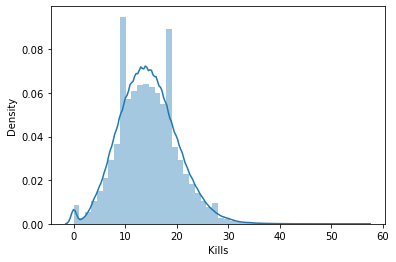

In [60]:
sns_plot = sns.distplot(df_scoreboard["Kills"])

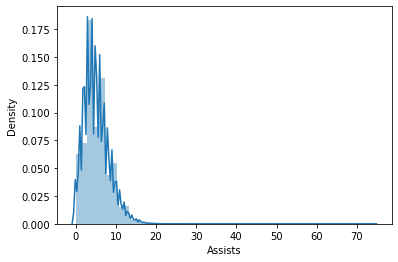

In [61]:
sns_plot = sns.distplot(df_scoreboard["Assists"])

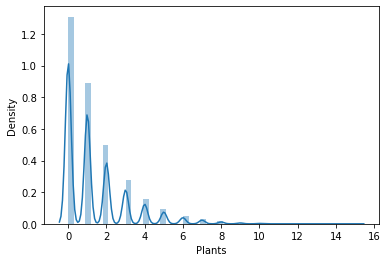

In [62]:
sns_plot = sns.distplot(df_scoreboard["Plants"])

In [63]:
df_scoreboard.head()

GameID PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  Deaths  \
0  60894     8419     Reduxx             Boos     jett  313.0   24.0    10.0   
1  60894      466     ChurmZ             Boos  chamber  227.0   16.0    10.0   
2  60894     3712   diaamond             Boos     sova  226.0   17.0     9.0   
3  60894     5099     Boltzy             Boos    viper  218.0   17.0    12.0   
4  60894     3983     Virtyy             Boos     skye   80.0    5.0    13.0   

   Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  \
0      3.0       14.0  ...      2.0      0.0      1.0      0.0        0.0   
1      7.0        6.0  ...      0.0      0.0      0.0      0.0        0.0   
2      8.0        8.0  ...      0.0      0.0      1.0      0.0        0.0   
3      2.0        5.0  ...      0.0      0.0      1.0      0.0        0.0   
4      3.0       -8.0  ...      0.0      0.0      0.0      0.0        0.0   

   OnevFour  OnevFive  Econ  Plants  Defuses  
0       0.0       0.0  74.0     0.0      0.0  
1       0.0       0.0  67.0     2.0      0.0  
2       0.0       0.0  58.0     3.0      0.0  
3       0.0       0.0  48.0     0.0      0.0  
4       0.0       0.0  21.0     0.0      0.0  

[5 rows x 28 columns]

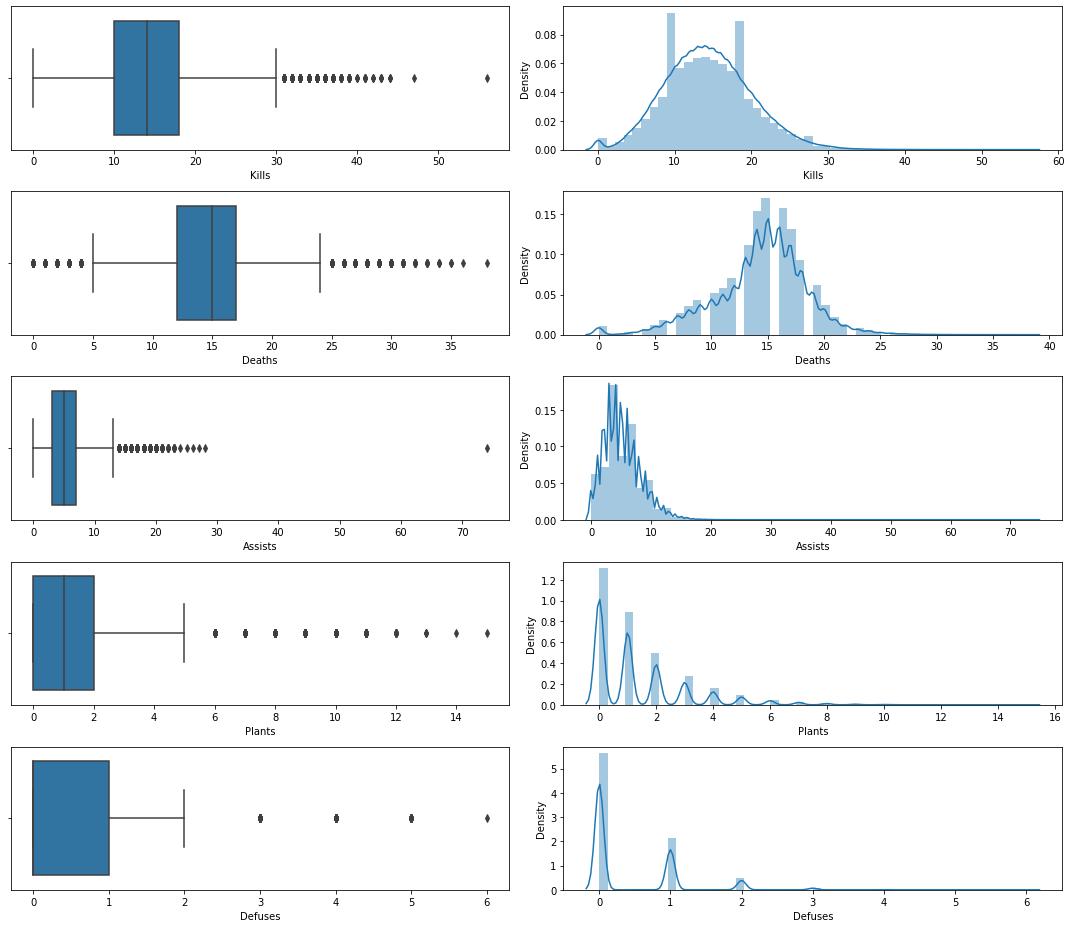

In [64]:
fig, ax = plt.subplots(5, 2, figsize = (15, 13))
sns.boxplot(x= df_scoreboard["Kills"], ax = ax[0,0])
sns.distplot(df_scoreboard['Kills'], ax = ax[0,1])
sns.boxplot(x= df_scoreboard["Deaths"], ax = ax[1,0])
sns.distplot(df_scoreboard['Deaths'], ax = ax[1,1])
sns.boxplot(x= df_scoreboard["Assists"], ax = ax[2,0])
sns.distplot(df_scoreboard['Assists'], ax = ax[2,1])
sns.boxplot(x= df_scoreboard["Plants"], ax = ax[3,0])
sns.distplot(df_scoreboard['Plants'], ax = ax[3,1])
sns.boxplot(x= df_scoreboard["Defuses"], ax = ax[4,0])
sns.distplot(df_scoreboard['Defuses'], ax = ax[4,1])
plt.tight_layout()

In [65]:
df_scoreboard_cleaned = df_scoreboard.dropna()
df_scoreboard_cleaned

GameID PlayerID   PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0      60894     8419       Reduxx             Boos     jett  313.0   24.0   
1      60894      466       ChurmZ             Boos  chamber  227.0   16.0   
2      60894     3712     diaamond             Boos     sova  226.0   17.0   
3      60894     5099       Boltzy             Boos    viper  218.0   17.0   
4      60894     3983       Virtyy             Boos     skye   80.0    5.0   
...      ...      ...          ...              ...      ...    ...    ...   
21883  53281     2126        Shawn              GEN     sage  196.0   12.0   
21884  53281     4927       NaturE              GEN     jett  149.0   10.0   
21885  53281      156  Temperature              GEN     sova  123.0    7.0   
21886  53281       64          gMd              GEN     omen  121.0    6.0   
21887  53281     8716       koosta              GEN    viper  101.0    5.0   

       Deaths  Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0        10.0      3.0       14.0  ...      2.0      0.0      1.0      0.0   
1        10.0      7.0        6.0  ...      0.0      0.0      0.0      0.0   
2         9.0      8.0        8.0  ...      0.0      0.0      1.0      0.0   
3        12.0      2.0        5.0  ...      0.0      0.0      1.0      0.0   
4        13.0      3.0       -8.0  ...      0.0      0.0      0.0      0.0   
...       ...      ...        ...  ...      ...      ...      ...      ...   
21883    13.0      3.0       -1.0  ...      0.0      0.0      0.0      0.0   
21884    13.0      1.0       -3.0  ...      1.0      0.0      0.0      0.0   
21885    12.0      3.0       -5.0  ...      0.0      0.0      0.0      0.0   
21886    16.0      4.0      -10.0  ...      0.0      0.0      0.0      0.0   
21887    14.0      7.0       -9.0  ...      0.0      0.0      0.0      0.0   

       OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0            0.0       0.0       0.0  74.0     0.0      0.0  
1            0.0       0.0       0.0  67.0     2.0      0.0  
2            0.0       0.0       0.0  58.0     3.0      0.0  
3            0.0       0.0       0.0  48.0     0.0      0.0  
4            0.0       0.0       0.0  21.0     0.0      0.0  
...          ...       ...       ...   ...     ...      ...  
21883        0.0       0.0       0.0  43.0     3.0      0.0  
21884        0.0       0.0       0.0  39.0     0.0      1.0  
21885        0.0       0.0       0.0  44.0     0.0      1.0  
21886        0.0       0.0       0.0  32.0     0.0      0.0  
21887        0.0       0.0       0.0  35.0     0.0      0.0  

[3367 rows x 28 columns]

Text(0, 0.5, 'Exam Score')

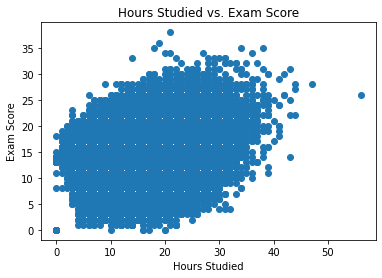

In [66]:

#create scatterplot of hours vs. score
plt.scatter(df_scoreboard["Kills"], df_scoreboard["Deaths"])
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

Text(0, 0.5, 'Assists')

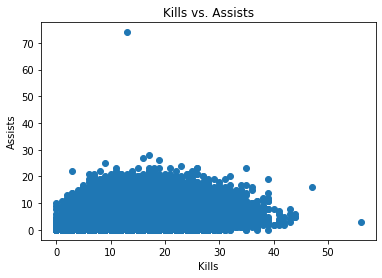

In [67]:
#create scatterplot of hours vs. score
plt.scatter(df_scoreboard["Kills"], df_scoreboard["Assists"])
plt.title('Kills vs. Assists')
plt.xlabel('Kills')
plt.ylabel('Assists')

In [68]:
from fitter import Fitter, get_common_distributions, get_distributions

sumsquare_error          aic           bic  kl_div
lognorm         0.071433  1576.168643 -2.299640e+06     inf
beta            0.071440  1600.478699 -2.299614e+06     inf
gamma           0.071440  1598.667604 -2.299626e+06     inf
norm            0.071851  1947.547679 -2.298734e+06     inf
burr            0.073985  1130.418124 -2.294103e+06     inf

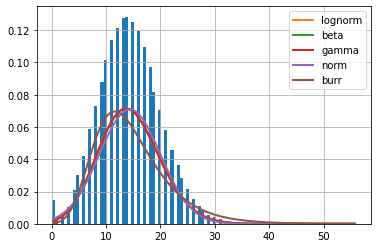

In [69]:
Kills = df_scoreboard["Kills"].values
Kills = Kills[np.logical_not(np.isnan(Kills))] 
f = Fitter(Kills,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0039462] [loc=14.368 scale=5.623]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0309937] [loc=0.000 scale=14.368]
[distfit] >[pareto    ] [2.15 sec] [RSS: 0.0644799] [loc=-2.696 scale=2.696]
[distfit] >[dweibull  ] [1.19 sec] [RSS: 0.0041518] [loc=13.608 scale=4.840]
[distfit] >[t         ] [2.80 sec] [RSS: 0.0040067] [loc=14.322 scale=5.416]
[distfit] >[genextreme] [5.77 sec] [RSS: 0.0039802] [loc=11.953 scale=5.301]
[distfit] >[gamma     ] [1.04 sec] [RSS: 0.0037878] [loc=-31.107 scale=0.694]
[distfit] >[lognorm   ] [5.98 sec] [RSS: 0.0037917] [loc=-52.337 scale=66.470]
[distfit] >[beta      ] [3.61 sec] [RSS: 0.0037878] [loc=-31.072 scale=11023959.598]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0332003] [loc=0.000 scale=56.000]
[distfit] >[loggamma  ] [2.24 sec] [RSS: 0.0039749] [loc=-1368.749 scale=195.088]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\na=65.38, b=15860599.41, loc=-31.07, scale=11023959.60'}, xlabel='Values', ylabel='Frequency'>)

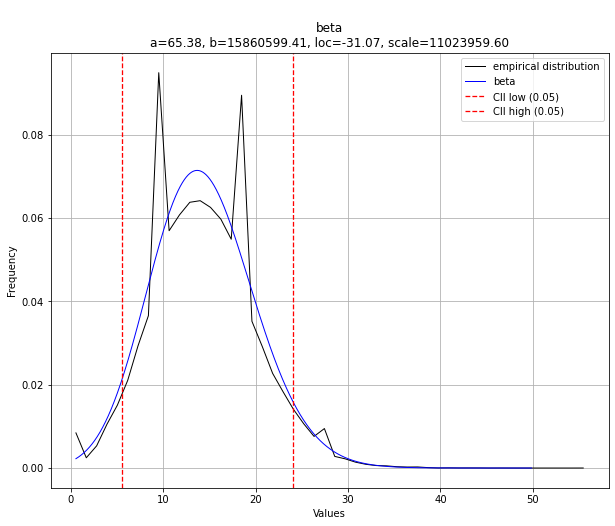

In [70]:
from distfit import distfit

# Initialize model
dist = distfit()

# Find best theoretical distribution for empirical data X
dist.fit_transform(Kills)
dist.plot()

## Agents :

In [71]:
df_scoreboard

GameID PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0       60894     8419     Reduxx             Boos     jett  313.0   24.0   
1       60894      466     ChurmZ             Boos  chamber  227.0   16.0   
2       60894     3712   diaamond             Boos     sova  226.0   17.0   
3       60894     5099     Boltzy             Boos    viper  218.0   17.0   
4       60894     3983     Virtyy             Boos     skye   80.0    5.0   
...       ...      ...        ...              ...      ...    ...    ...   
157934     13       24      Gover                              0.0    0.0   
157935     13       25      Jack1                              0.0    0.0   
157936     13       26     Rewind                              0.0    0.0   
157937     13       27      Woo1y                              0.0    0.0   
157938     13       28    DrasseL                              0.0    0.0   

        Deaths  Assists  PlusMinus  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  \
0         10.0      3.0       14.0  ...      2.0      0.0      1.0      0.0   
1         10.0      7.0        6.0  ...      0.0      0.0      0.0      0.0   
2          9.0      8.0        8.0  ...      0.0      0.0      1.0      0.0   
3         12.0      2.0        5.0  ...      0.0      0.0      1.0      0.0   
4         13.0      3.0       -8.0  ...      0.0      0.0      0.0      0.0   
...        ...      ...        ...  ...      ...      ...      ...      ...   
157934     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   
157935     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   
157936     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   
157937     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   
157938     0.0      0.0        NaN  ...      NaN      NaN      NaN      NaN   

        OnevThree  OnevFour  OnevFive  Econ  Plants  Defuses  
0             0.0       0.0       0.0  74.0     0.0      0.0  
1             0.0       0.0       0.0  67.0     2.0      0.0  
2             0.0       0.0       0.0  58.0     3.0      0.0  
3             0.0       0.0       0.0  48.0     0.0      0.0  
4             0.0       0.0       0.0  21.0     0.0      0.0  
...           ...       ...       ...   ...     ...      ...  
157934        NaN       NaN       NaN   NaN     NaN      NaN  
157935        NaN       NaN       NaN   NaN     NaN      NaN  
157936        NaN       NaN       NaN   NaN     NaN      NaN  
157937        NaN       NaN       NaN   NaN     NaN      NaN  
157938        NaN       NaN       NaN   NaN     NaN      NaN  

[157939 rows x 28 columns]

In [102]:
len(df_agents)

18

In [109]:
df_agents= df_scoreboard.groupby("Agent").mean().sort_values(by='ACS', ascending=False)
df_agents.head()

ACS      Kills     Deaths   Assists  PlusMinus  KAST_Percent  \
Agent                                                                          
raze     235.210910  16.141252  15.286146  4.715481   0.855106      0.686279   
reyna    230.294592  16.426312  15.196395  4.201929   1.229918      0.690932   
jett     230.045706  16.582086  15.028903  3.306768   1.553183      0.682714   
phoenix  221.685185  15.572784  15.042814  4.794029   0.529970      0.630000   
yoru     213.034483  15.088670  15.487685  4.339901  -0.399015           NaN   

                ADR  HS_Percent  FirstKills  FirstDeaths  ...   Num_4Ks  \
Agent                                                     ...             
raze     150.846141    0.180850    2.853556     2.775425  ...  0.226162   
reyna    146.345062    0.259528    2.904016     2.838500  ...  0.274841   
jett     141.720387    0.229524    3.656197     3.025411  ...  0.262311   
phoenix  140.427653    0.252350    2.768750     2.689311  ...  0.216443   
yoru     135.788177    0.250493    2.743842     2.817734  ...  0.246305   

          Num_5Ks   OnevOne   OnevTwo  OnevThree  OnevFour  OnevFive  \
Agent                                                                  
raze     0.029545  0.151125  0.080460   0.016675  0.002914  0.000486   
reyna    0.040169  0.167995  0.081965   0.021142  0.004228  0.000163   
jett     0.034978  0.166248  0.082346   0.020850  0.003612  0.000366   
phoenix  0.027150  0.156306  0.081198   0.019792  0.003552  0.000000   
yoru     0.024631  0.187192  0.064039   0.024631  0.000000  0.000000   

              Econ    Plants   Defuses  
Agent                                   
raze     59.121661  0.591145  0.427311  
reyna    58.550171  0.490649  0.287689  
jett     58.974258  0.496502  0.344337  
phoenix  56.124841  0.747780  0.485156  
yoru     52.837438  0.748768  0.285714  

[5 rows x 23 columns]

In [104]:
#df_scoreboard.groupby(by="Agent").sum().sort_values(by='Kills', ascending=False)

In [129]:
def return_sorted2(df_new,col_name):
    sorted_df = df_new.sort_values(by=col_name, ascending=False)
    return {'Agent': sorted_df.index.to_list(), col_name: sorted_df[col_name].to_list()}

In [130]:
ACS_dict = return_sorted2(df_agents,'ACS')

fig_ACS= px.bar(ACS_dict, x = ACS_dict['Agent'], y = 'ACS', title = 'Average number of ACS by Agent')
fig_ACS.show()

In [131]:
kills_dict = return_sorted2(df_agents,'Kills')

fig_kills= px.bar(kills_dict, x = kills_dict['Agent'], y = 'Kills', title = 'Average number of Kills by Agent')
fig_kills.show()

In [132]:
Assists_dict = return_sorted2(df_agents,'Assists')

fig_Assists= px.bar(Assists_dict, x = Assists_dict['Agent'], y = 'Assists', title = 'Average number of Assists by Agent')
fig_Assists.show()

In [133]:
Deaths_dict = return_sorted2(df_agents,'Deaths')

fig_Deaths= px.bar(Deaths_dict, x = Deaths_dict['Agent'], y = 'Deaths', title = 'Average number of Deaths by Agent')
fig_Deaths.show()

In [134]:
FirstDeaths_dict = return_sorted2(df_agents,'FirstDeaths')

fig_FirstDeaths= px.bar(FirstDeaths_dict, x = Deaths_dict['Agent'], y = 'FirstDeaths', title = 'Average number of FirstDeaths by Agent')
fig_FirstDeaths.show()

In [135]:
Plants_dict = return_sorted2(df_agents,'Plants')

fig_Plants= px.bar(Plants_dict, x = Deaths_dict['Agent'], y = 'Plants', title = 'Average number of Plants by Agent')
fig_Plants.show()